In [0]:
# Import TensorFlow and keras
import matplotlib.pyplot as plt
import tensorflow as keras
import numpy as np
import keras as keras
%matplotlib inline
# Helper librariesa numpy, matplotlib


##The Fashion MNIST dataset includes:

60,000 training examples,
10,000 testing examples,
10 classes,
28×28 grayscale/single channel images

###The ten fashion class labels include:

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

In [5]:
#load data
fashion_mnist = keras.datasets.fashion_mnist
#hint: train - test ?


(train_img, train_labels), (test_imag, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


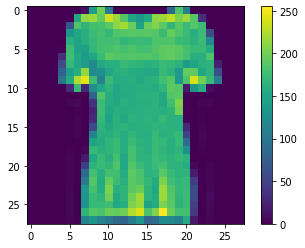

In [6]:
plt.figure()
plt.imshow(train_img[10])
plt.colorbar()
plt.grid(False)
# plt.show()

In [0]:
#scale your data
train_img=train_img/255.0
test_imag=test_imag/255.0

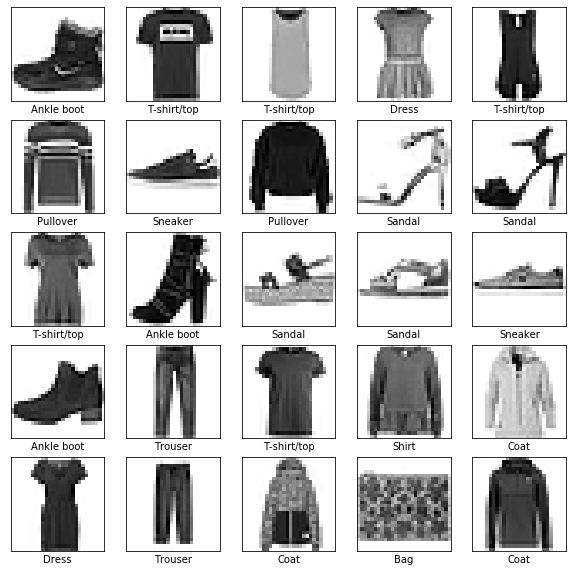

In [8]:
#see your first 25 object
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
# plt.show()

**NOTE:** you should create most basic version of your network, then improve your network.


In [9]:
#create your network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #put your hidden layers here
    keras.layers.Dense(128, activation="relu"),
    
    #last layer
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
#compile
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#some useful parameters : (epochs,step_per_epoch,batch_size)
model.fit(train_img, train_labels,epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 7s 113us/step - loss: 0.4985 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3776 - acc: 0.8649
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3380 - acc: 0.8757
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3133 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2973 - acc: 0.8899
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2806 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2685 - acc: 0.8999
Epoch 8/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2559 - acc: 0.9056
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2464 -

In [11]:
#model evaluation
test_lost,test_acc = model.evaluate(test_imag, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.8859


In [12]:
#predict
predictions=model.predict(test_imag)
np.argmax(predictions[0])
#take an example prediction from index zero. hint: argmax


9

In [0]:
#plot images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

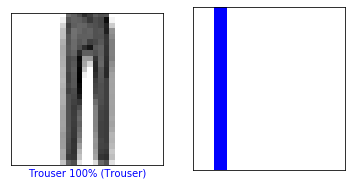

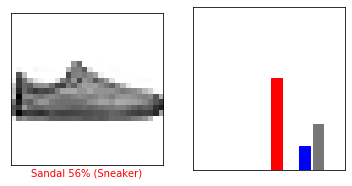

In [14]:


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_imag)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_imag)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


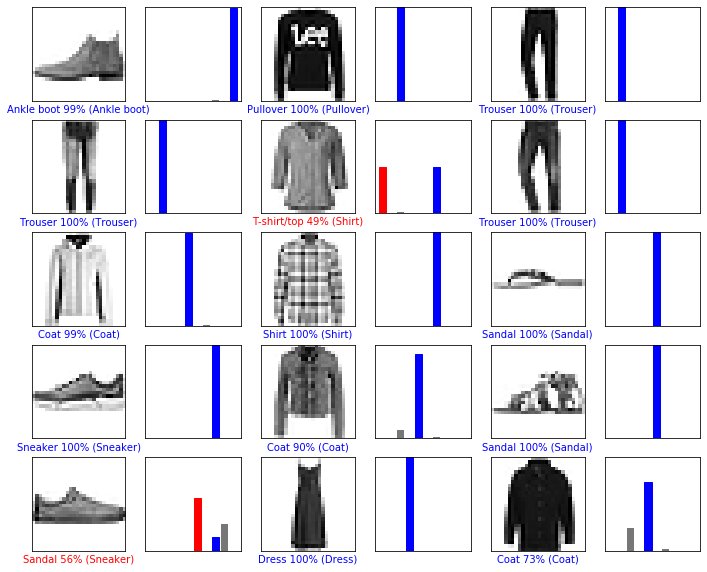

In [15]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_imag)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [16]:
# Grab an image from the test dataset
img = test_imag[0]

print(img.shape)

(28, 28)


In [17]:
img=(np.expand_dims(img,0))
print(img.shape)
# Add the image to a batch where it's the only member.



(1, 28, 28)


In [18]:
predictions_single=model.predict(img)
print(predictions_single)

[[6.15625731e-06 1.16137766e-10 1.77412240e-09 2.53923532e-12
  7.12633730e-09 4.69275983e-04 2.89024865e-06 7.90931191e-03
  1.87536813e-07 9.91612077e-01]]


9

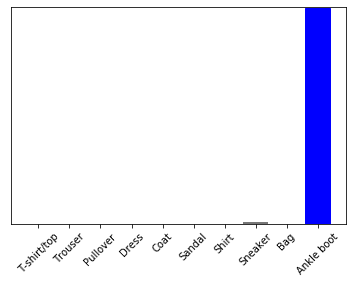

In [19]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])